# Pgx baseline models

Pgx offers several baseline models. These models are not as powerful as state-of-the-art (SoTA) models, but they serve as useful opponents for Pgx users to grasp the learning process of their algorithm.

In [ ]:
!pip install pgx dm-haiku  # additionaly requires Haiku library

In [2]:
import jax
import jax.numpy as jnp
import pgx

import haiku as hk
from IPython.display import *

print(pgx.__version__)
print(hk.__version__)

0.10.0
0.0.9


## Run self-play with greedy action selection

Note

- `pgx.make_baseline_model` will download the model file from Google Drive and stores it to `<curr_dir>/baselines/` by default
- This example does not use MCTS for the simplicty. You can enhance the model by uzing [mctx](https://github.com/deepmind/mctx) library.

In [3]:
env_id = "go_9x9"
model_id = "go_9x9_v0"

env = pgx.make(env_id)
model = pgx.make_baseline_model(model_id)

init_fn = jax.jit(jax.vmap(env.init))
step_fn = jax.jit(jax.vmap(env.step))

states = []
batch_size = 1
keys = jax.random.split(jax.random.PRNGKey(0), batch_size)
state = init_fn(keys)
states.append(state)
while not (state.terminated | state.truncated).all():
    logits, value = model(state.observation)
    action = logits.argmax(axis=-1)
    state = step_fn(state, action)
    states.append(state)

## See how it plays

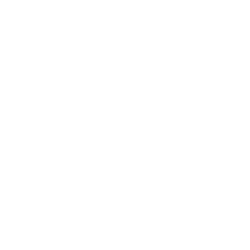

In [4]:
pgx.save_svg_animation(states, f"{env_id}.svg", frame_duration_seconds=0.5)
display_svg(SVG(f"{env_id}.svg"))

## Other baseline models

So far, we support these baseline models:

In [5]:
pgx.BaselineModelId

typing.Literal['animal_shogi_v0', 'gardner_chess_v0', 'go_9x9_v0', 'hex_v0', 'othello_v0']